In [7]:
from pathlib import Path
import json
import pandas as pd
import numpy as np
import re
import ast
import pandas as pd

### Load in scores and outputs from BoN (up to 16)

In [8]:
# Load and process the .jsonl file
def load_jsonl_extract_accuracy(jsonl_path):
    data = []

    with open(jsonl_path, "r") as f:
        for line in f:
            entry = json.loads(line)
            question = entry["problem"]
            score_list = entry["agg_scores"] 
            completion_tokens = entry["completion_tokens"]
            indicator_weighted_1 = entry["indicator_weighted@1"]
            indicator_naive_1 = entry["indicator_naive@1"]
            indicator_maj_1 = entry["indicator_maj@1"]
            indicator_weighted_2 = entry["indicator_weighted@2"]
            indicator_naive_2 = entry["indicator_naive@2"]
            indicator_maj_2 = entry["indicator_maj@2"]
            indicator_weighted_4 = entry["indicator_weighted@4"]
            indicator_naive_4 = entry["indicator_naive@4"]
            indicator_maj_4 = entry["indicator_maj@4"]
            indicator_weighted_8 = entry["indicator_weighted@8"]
            indicator_naive_8 = entry["indicator_naive@8"]
            indicator_maj_8 = entry["indicator_maj@8"]
            indicator_weighted_16 = entry["indicator_weighted@16"]
            indicator_naive_16 = entry["indicator_naive@16"]
            indicator_maj_16 = entry["indicator_maj@16"]
            # indicator_weighted_32 = entry["indicator_weighted@32"]
            # indicator_naive_32 = entry["indicator_naive@32"]
            # indicator_maj_32 = entry["indicator_maj@32"]
            correctness_1 = entry["correctness@1"]
            correctness_2 = entry["correctness@2"]
            correctness_4 = entry["correctness@4"]
            correctness_8 = entry["correctness@8"]
            correctness_16 = entry["correctness@16"]
            # correctness_32 = entry["correctness@32"]
            data.append({
                "question": question,
                "score": score_list,
                "score_list": score_list,
                "completion_tokens": completion_tokens,
                "indicator_weighted_1": indicator_weighted_1,
                "indicator_naive_1": indicator_naive_1,
                "indicator_maj_1": indicator_maj_1,
                "indicator_weighted_2": indicator_weighted_2,
                "indicator_naive_2": indicator_naive_2,
                "indicator_maj_2": indicator_maj_2,
                "indicator_weighted_4": indicator_weighted_4,
                "indicator_naive_4": indicator_naive_4,
                "indicator_maj_4": indicator_maj_4,
                "indicator_weighted_8": indicator_weighted_8,
                "indicator_naive_8": indicator_naive_8,
                "indicator_maj_8": indicator_maj_8,
                "indicator_weighted_16": indicator_weighted_16,
                "indicator_naive_16": indicator_naive_16,
                "indicator_maj_16": indicator_maj_16,
                # "indicator_weighted_32": indicator_weighted_32,
                # "indicator_naive_32": indicator_naive_32,
                # "indicator_maj_32": indicator_maj_32,
                "correctness_1": correctness_1,
                "correctness_2": correctness_2,
                "correctness_4": correctness_4,
                "correctness_8": correctness_8,
                "correctness_16": correctness_16, 
                #  "correctness_32": correctness_32, # list of whether each of 32 generations is correct or not.
            })

    return pd.DataFrame(data)

In [4]:
df_N16 = load_jsonl_extract_accuracy("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_16_numina/best_of_n_completions.jsonl")

In [62]:
df_N16.head(10)

,question,score,score_list,completion_tokens,indicator_weighted_1,indicator_naive_1,indicator_maj_1,indicator_weighted_2,indicator_naive_2,indicator_maj_2,...,indicator_maj_8,indicator_weighted_16,indicator_naive_16,indicator_maj_16,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,sb_idx
0,Consider the terms of an arithmetic sequence: ...,"[1.0, 1.0, 1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0...","[1.0, 1.0, 1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0...","[390, 506, 605, 414, 302, 523, 218, 419, 646, ...",1,1,1,1,1,1,...,1,1,1,1,[True],"[True, False]","[True, False, False, True]","[True, False, False, True, False, True, True, ...","[True, False, False, True, False, True, True, ...",0
1,Suppose that $g(x) = 5x - 3$. What is $g^{-1}(...,"[0.1215820312, 0.1186523438, 1.0, 0.99609375, ...","[0.1215820312, 0.1186523438, 1.0, 0.99609375, ...","[238, 325, 338, 430, 223, 308, 366, 318, 372, ...",0,0,0,0,0,0,...,0,1,0,1,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, True, Fals...","[False, False, False, False, False, True, Fals...",1
2,A farmer has a rectangular field with dimensio...,"[0.0583496094, 0.0393066406, 0.796875, 0.48828...","[0.0583496094, 0.0393066406, 0.796875, 0.48828...","[631, 1217, 721, 894, 17, 682, 952, 812, 385, ...",0,0,0,0,0,0,...,0,0,0,0,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",2
3,Given the functions $f(x) = \log_a(1+x)$ and $...,"[1.0, 1.0, 1.0, 0.2197265625, 0.9921875, 0.002...","[1.0, 1.0, 1.0, 0.2197265625, 0.9921875, 0.002...","[974, 839, 954, 842, 789, 923, 737, 560, 725, ...",0,0,0,0,0,0,...,0,0,0,0,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, True, Fals...","[False, False, False, False, False, True, Fals...",3
4,Find all solutions to the equation $\displayst...,"[0.95703125, 0.037109375, 0.99609375, 0.996093...","[0.95703125, 0.037109375, 0.99609375, 0.996093...","[274, 13, 234, 189, 283, 220, 315, 175, 197, 2...",0,0,0,0,0,0,...,1,1,1,1,[False],"[False, False]","[False, False, False, True]","[False, False, False, True, True, True, True, ...","[False, False, False, True, True, True, True, ...",4
5,"In $\triangle ABC$, the lengths of the sides o...","[0.9140625, 0.4375, 0.0244140625, 0.0322265625...","[0.9140625, 0.4375, 0.0244140625, 0.0322265625...","[1045, 490, 1261, 920, 1196, 1036, 1024, 1118,...",0,0,0,0,0,0,...,0,0,0,0,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",5
6,"Julian is writing a comic book. On average, hi...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7265625, 0.00...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7265625, 0.00...","[379, 422, 350, 251, 331, 482, 529, 374, 324, ...",1,1,1,1,1,1,...,1,1,1,1,[True],"[True, True]","[True, True, False, True]","[True, True, False, True, False, False, False,...","[True, True, False, True, False, False, False,...",6
7,If an arc of $60^{\circ}$ on circle $C$ has th...,"[1.0, 0.9140625, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[1.0, 0.9140625, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[466, 756, 415, 540, 619, 485, 320, 427, 550, ...",0,0,0,0,0,0,...,0,0,0,0,[False],"[False, False]","[False, False, False, True]","[False, False, False, True, False, False, True...","[False, False, False, True, False, False, True...",7
8,Given that $P$ is any point on the circle $C$:...,"[0.51953125, 0.48828125, 0.1494140625, 0.84765...","[0.51953125, 0.48828125, 0.1494140625, 0.84765...","[1287, 523, 916, 1415, 689, 942, 620, 1047, 67...",0,0,0,0,0,0,...,0,0,0,0,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",8
9,Compute $\cos 225^\circ$.,"[1.0, 0.98828125, 1.0, 1.0, 0.0473632812, 1.0,...","[1.0, 0.98828125, 1.0, 1.0, 0.0473632812, 1.0,...","[126, 316, 314, 26

In [6]:
# add column for question index.
df_N16["sb_idx"] = df_N16.index.tolist()

In [18]:
df_N16.columns, df_N16.shape

(Index(['question', 'score', 'score_list', 'completion_tokens',
        'indicator_weighted_1', 'indicator_naive_1', 'indicator_maj_1',
        'indicator_weighted_2', 'indicator_naive_2', 'indicator_maj_2',
        'indicator_weighted_4', 'indicator_naive_4', 'indicator_maj_4',
        'indicator_weighted_8', 'indicator_naive_8', 'indicator_maj_8',
        'indicator_weighted_16', 'indicator_naive_16', 'indicator_maj_16',
        'correctness_1', 'correctness_2', 'correctness_4', 'correctness_8',
        'correctness_16', 'sb_idx'],
       dtype='object'),
 (5000, 25))

### Load in Step-Beam Data

In [27]:
def load_jsonl_extract_accuracy_beam(jsonl_path, target_N):
    data = []

    with open(jsonl_path, "r") as f:
        for line in f:
            entry = json.loads(line)
            question = entry["problem"]
            score_list = entry["agg_scores"]
            completion_tokens = entry["completion_tokens"] # (Later: check on why all of the completion tokens are 0.)

            # Dynamically load only the @N values matching the target_N
            indicator_weighted = entry.get(f"indicator_weighted@{target_N}") 
            indicator_naive = entry.get(f"indicator_naive@{target_N}")
            indicator_maj = entry.get(f"indicator_maj@{target_N}")
            correctness = entry.get(f"correctness@{target_N}")

            # Append only the relevant data
            data.append({
                "question": question,
                "score": score_list,
                "completion_tokens": completion_tokens,
                "indicator_weighted": indicator_weighted, 
                "indicator_naive": indicator_naive,        
                "indicator_maj": indicator_maj,           
                "correctness": correctness,              
            })

    return pd.DataFrame(data)

In [75]:
df_2_2_40 = load_jsonl_extract_accuracy_beam("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/beam_search_2_2_40/beam_search_completions.jsonl", 2)
df_2_8_40 = load_jsonl_extract_accuracy_beam("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/beam_search_2_8_40/beam_search_completions.jsonl", 2)
df_4_2_40 = load_jsonl_extract_accuracy_beam("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/beam_search_4_2_40/beam_search_completions.jsonl", 4)
df_4_4_40 = load_jsonl_extract_accuracy_beam("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/beam_search_4_4_40/beam_search_completions.jsonl", 4)
df_8_2_40 = load_jsonl_extract_accuracy_beam("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/beam_search_8_2_40/beam_search_completions.jsonl", 8)
df_16_20 = load_jsonl_extract_accuracy_beam("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/beam_search_16_4_20/beam_search_completions.jsonl", 16)
df_N16 = load_jsonl_extract_accuracy("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_16_numina/best_of_n_completions.jsonl")

In [13]:
df_8_2_40.head(10)

,question,score,completion_tokens,indicator_weighted,indicator_naive,indicator_maj,correctness
0,Consider the terms of an arithmetic sequence: ...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 0]",1,1,1,"[True, True, True, True, True, True, True, True]"
1,Suppose that $g(x) = 5x - 3$. What is $g^{-1}(...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 0]",1,1,1,"[True, True, True, False, True, True, True, True]"
2,A farmer has a rectangular field with dimensio...,"[0.003326416, 0.294921875, 0.412109375, 0.5273...","[0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,"[False, False, False, False, False, False, Fal..."
3,Given the functions $f(x) = \log_a(1+x)$ and $...,"[1.0, 1.0, 1.0, 1.0, 0.482421875, 0.392578125,...","[0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,"[False, False, False, False, False, False, Fal..."
4,Find all solutions to the equation $\displayst...,"[0.99609375, 0.99609375, 1.0, 0.9921875, 1.0, ...","[0, 0, 0, 0, 0, 0, 0, 0]",1,1,1,"[True, True, True, True, True, True, True, True]"
5,"In $\triangle ABC$, the lengths of the sides o...","[0.0092773438, 0.000793457, 0.0005531311, 0.87...","[0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,"[False, False, False, False, False, False, Fal..."
6,"Julian is writing a comic book. On average, hi...","[0.0319824219, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,"[False, False, True, False, False, True, False..."
7,If an arc of $60^{\circ}$ on circle $C$ has th...,"[0.546875, 1.0, 1.0, 1.0, 0.99609375, 1.0, 1.0...","[0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,"[True, False, False, False, False, False, Fals..."
8,Given that $P$ is any point on the circle $C$:...,"[0.0267333984, 0.96484375, 0.0065917969, 0.628...","[0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,"[False, False, False, False, False, False, Fal..."
9,Compute $\cos 225^\circ$.,"[1.0, 0.99609375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,"[False, False, False, False, False, False, Fal..."


In [24]:
def melt_dataframe(df, N, M, D):
    """
    Melt the dataframe from wide to long format based on the given target_N.

    Args:
        df (pd.DataFrame): The unmelted dataframe.
        target_N (int): The target N value.

    Returns:
        pd.DataFrame: The melted dataframe.
    """
    # Columns to melt (indicators)
    ind_cols = [
        "indicator_weighted",
        "indicator_naive",
        "indicator_maj",
    ]

    # Melt the dataframe from wide to long
    predictor_df = df.melt(
        id_vars=['question', 'score', 'completion_tokens', 'correctness'],
        value_vars=ind_cols,
        var_name='method',
        value_name='indicator'
    )  # indicator: whether the final answer is correct.

    # filter for only the indicator_maj rows (aka, we only want the majority vote to score beam.)
    predictor_df = predictor_df[predictor_df["method"] == "indicator_maj"]

    # Convert completion_tokens to a list of integers
    predictor_df["completion_tokens"] = predictor_df["completion_tokens"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )

    # Compute token count
    predictor_df["token_count"] = predictor_df["completion_tokens"].apply(sum)

    # Add the target_N column
    predictor_df["N"] = N
    predictor_df["M"] = M
    predictor_df["D"] = D


    return predictor_df

In [91]:
# Apply the melt_dataframe function to each DataFrame
melted_2_2_40 = melt_dataframe(df_2_2_40, 2, 2, 40)
melted_2_8_40 = melt_dataframe(df_2_8_40, 2, 8, 40)
melted_4_2_40 = melt_dataframe(df_4_2_40, 4, 2, 40)
melted_4_4_40 = melt_dataframe(df_4_4_40, 4, 4, 40)
melted_8_2_40 = melt_dataframe(df_8_2_40, 8, 2, 40)
melted_16_4_20 = melt_dataframe(df_16_20, 16, 4, 20)

In [92]:
melted_8_2_40.head()

,question,score,completion_tokens,correctness,method,indicator,token_count,N,M,D
20,Consider the terms of an arithmetic sequence: ...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 0]","[True, True, True, True, True, True, True, True]",indicator_maj,1,0,8,2,40
21,Suppose that $g(x) = 5x - 3$. What is $g^{-1}(...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 0]","[True, True, True, False, True, True, True, True]",indicator_maj,1,0,8,2,40
22,A farmer has a rectangular field with dimensio...,"[0.003326416, 0.294921875, 0.412109375, 0.5273...","[0, 0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, Fal...",indicator_maj,0,0,8,2,40
23,Given the functions $f(x) = \log_a(1+x)$ and $...,"[1.0, 1.0, 1.0, 1.0, 0.482421875, 0.392578125,...","[0, 0, 0, 0, 0, 0, 0, 0]","[False, False, False, False, False, False, Fal...",indicator_maj,0,0,8,2,40
24,Find all solutions to the equation $\displayst...,"[0.99609375, 0.99609375, 1.0, 0.9921875, 1.0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[True, True, True, True, True, True, True, True]",indicator_maj,1,0,8,2,40


In [94]:
# join all of the melted dataframes together.
predictor_df_beam = pd.concat([melted_2_2_40, melted_2_8_40, melted_4_2_40, melted_4_4_40, melted_8_2_40, melted_16_4_20], ignore_index=True) 

In [95]:
# Compute the average indicator for each N
beam_accuracies = predictor_df_beam.groupby(["N", "M", "D"])["indicator"].mean().reset_index()
# rename indicator column to accuracy.
beam_accuracies.rename(columns={"indicator": "accuracy"}, inplace=True)
# rename N to "beam size" and M to "beam width" and D to "Max Beam Depth"
beam_accuracies.rename(columns={"N": "beam size", "M": "beam width", "D": "mat beam depth"}, inplace=True)

In [96]:
beam_accuracies

,beam size,beam width,mat beam depth,accuracy
0,2,2,40,0.3244
1,2,8,40,0.2684
2,4,2,40,0.3830
3,4,4,40,0.3808
4,8,2,40,0.3000
5,16,4,20,0.4476


#### Create Accuracy Plot

In [ ]:
# create pivot table.

# Columns to melt (indicators)
ind_cols = [
    "indicator_weighted_1", "indicator_naive_1", "indicator_maj_1",
    "indicator_weighted_2", "indicator_naive_2", "indicator_maj_2",
    "indicator_weighted_4", "indicator_naive_4", "indicator_maj_4",
    "indicator_weighted_8", "indicator_naive_8", "indicator_maj_8",
    "indicator_weighted_16", "indicator_naive_16", "indicator_maj_16",
    # "indicator_weighted_32", "indicator_naive_32", "indicator_maj_32",
]

# Melt the dataframe from wide to long
predictor_df = df_N16.melt(
    id_vars=['question', 'score', 'score_list', 'completion_tokens', 'sb_idx', 
             'correctness_1', 'correctness_2', 'correctness_4', 'correctness_8', 'correctness_16'], # , 'correctness_32'
    value_vars=ind_cols,
    var_name='method_N',
    value_name='indicator'
) # indicator: whether the final answer is correct.

# # Extract method and N from 'method_N'
predictor_df[['drop', 'method', 'N']] = predictor_df['method_N'].str.extract(r'(indicator)_(\w+?)_(\d+)')
predictor_df.drop(columns=['method_N', 'drop'], inplace=True)

# Convert N to integer
predictor_df['N'] = predictor_df['N'].astype(int)

# Show result
predictor_df.head()

In [ ]:
predictor_df.shape # 5000 questions, 15 configurations = 75000 rows.

(75000, 13)

In [20]:
# sanity check that melting worked correctly.
# predictor_df[predictor_df["sb_idx"] == 1]
# type(predictor_df["completion_tokens"][0]) 

### change completion_tokens to a list of ints.
predictor_df["completion_tokens"] = predictor_df["completion_tokens"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [22]:
# Compute length of question (aka, length of the string)
predictor_df["question_length"] = predictor_df["question"].str.len()
predictor_df["token_count"] = predictor_df["completion_tokens"].apply(sum)
# predictor_df = pd.get_dummies(predictor_df, columns=["method"])

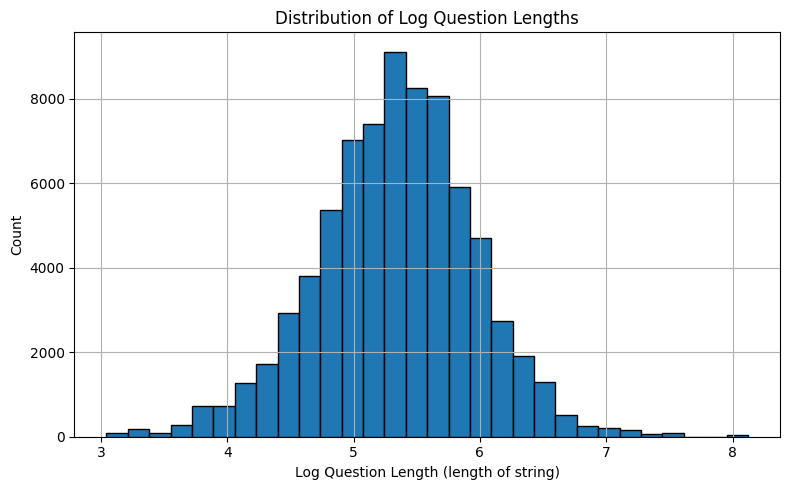

In [12]:
import matplotlib.pyplot as plt

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(np.log(predictor_df["question_length"]), bins=30, edgecolor='black')

plt.xlabel("Log Question Length (length of string)")
plt.ylabel("Count")
plt.title("Distribution of Log Question Lengths")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

### Plots of Accuracy

In [57]:
N_val = [1, 2, 4, 8, 16] # , 32
mv_accuracy = np.mean(df_N16["indicator_maj_1"]), np.mean(df_N16["indicator_maj_2"]), np.mean(df_N16["indicator_maj_4"]), np.mean(df_N16["indicator_maj_8"]), np.mean(df_N16["indicator_maj_16"])
BoN_vanilla_accuracy = np.mean(df_N16["indicator_naive_1"]), np.mean(df_N16["indicator_naive_2"]), np.mean(df_N16["indicator_naive_4"]), np.mean(df_N16["indicator_naive_8"]), np.mean(df_N16["indicator_naive_16"])
BoN_weighted_accuracy = np.mean(df_N16["indicator_weighted_1"]), np.mean(df_N16["indicator_weighted_2"]), np.mean(df_N16["indicator_weighted_4"]), np.mean(df_N16["indicator_weighted_8"]), np.mean(df_N16["indicator_weighted_16"])
df_accuracy = pd.DataFrame({
    "N": N_val,
    "majority_vote": mv_accuracy,
    "BoN_vanilla": BoN_vanilla_accuracy,
    "BoN_weighted": BoN_weighted_accuracy
})

In [58]:
df_accuracy.head()

,N,majority_vote,BoN_vanilla,BoN_weighted
0,1,0.2734,0.2734,0.2734
1,2,0.2734,0.3276,0.3276
2,4,0.3268,0.3582,0.3642
3,8,0.3660,0.3774,0.3926
4,16,0.3920,0.3826,0.4114


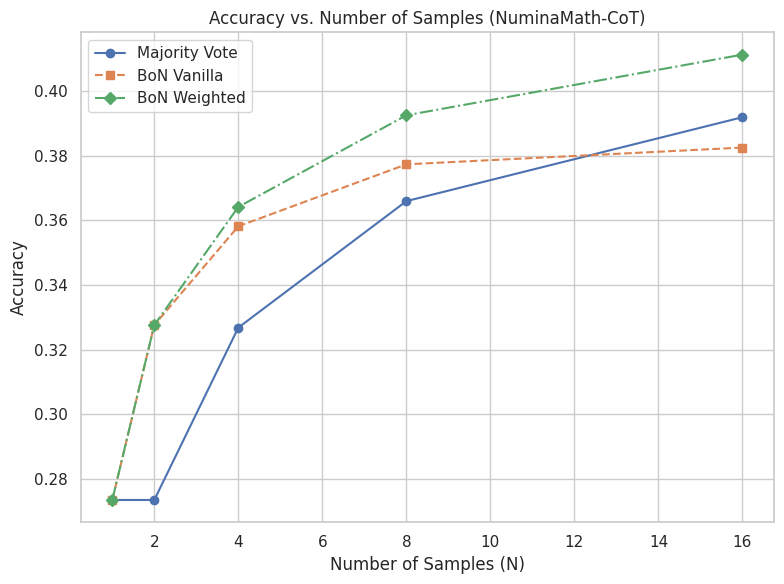

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Create scatter plot of accuracy vs. number of samples
plt.figure(figsize=(8, 6))
plt.plot(df_accuracy["N"], df_accuracy["majority_vote"], 'o-', label="Majority Vote")
plt.plot(df_accuracy["N"], df_accuracy["BoN_vanilla"], 's--', label="BoN Vanilla")
plt.plot(df_accuracy["N"], df_accuracy["BoN_weighted"], 'D-.', label="BoN Weighted")

# Formatting
plt.xlabel("Number of Samples (N)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Samples (NuminaMath-CoT)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# plt.savefig("accuracy_vs_N_Math500_Bo32.png", dpi=300)
plt.show()

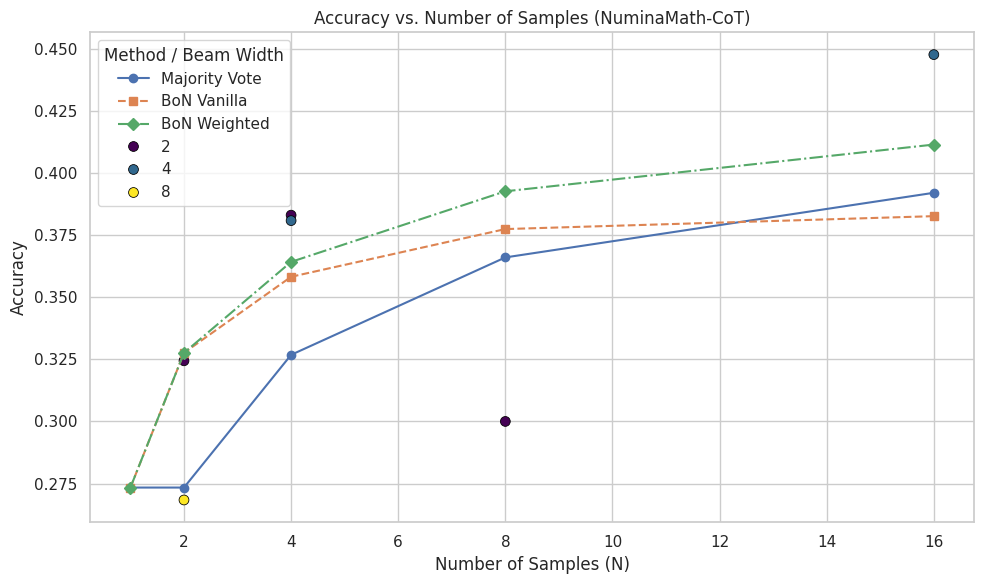

In [97]:
plt.figure(figsize=(10, 6))

# Line plots from df_accuracy
plt.plot(df_accuracy["N"], df_accuracy["majority_vote"], 'o-', label="Majority Vote")
plt.plot(df_accuracy["N"], df_accuracy["BoN_vanilla"], 's--', label="BoN Vanilla")
plt.plot(df_accuracy["N"], df_accuracy["BoN_weighted"], 'D-.', label="BoN Weighted")

# Overlayed scatter plot from beam_accuracies
sns.scatterplot(
    data=beam_accuracies,
    x="beam size",
    y="accuracy",
    hue="beam width",
    palette="viridis",
    s=50,
    edgecolor='black'
    # label=None  # suppress default legend entry for scatter
)

# Formatting
plt.xlabel("Number of Samples (N)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Samples (NuminaMath-CoT)")
plt.grid(True)

# Merge legends: first for the lines, then for the hue
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # remove duplicates
plt.legend(by_label.values(), by_label.keys(), title="Method / Beam Width")

plt.tight_layout()
plt.show()

In [ ]:
# save to csv.
output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/numina_hardlabel_predictor_df.csv"
# predictor_df.to_csv(output_file, index=False)

# read df.
predictor_df = pd.read_csv(output_file)

In [16]:
predictor_df.head(5)

,question,score,score_list,completion_tokens,sb_idx,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,indicator,N,question_length,token_count,method_maj,method_naive,method_weighted
0,Consider the terms of an arithmetic sequence: ...,"[1.0, 1.0, 1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0...","[1.0, 1.0, 1.0, 1.0, 0.99609375, 1.0, 1.0, 1.0...","[390, 506, 605, 414, 302, 523, 218, 419, 646, ...",0,[True],"[True, False]","[True, False, False, True]","[True, False, False, True, False, True, True, ...","[True, False, False, True, False, True, True, ...",1,1,93,13163,False,False,True
1,Suppose that $g(x) = 5x - 3$. What is $g^{-1}(...,"[0.1215820312, 0.1186523438, 1.0, 0.99609375, ...","[0.1215820312, 0.1186523438, 1.0, 0.99609375, ...","[238, 325, 338, 430, 223, 308, 366, 318, 372, ...",1,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, True, Fals...","[False, False, False, False, False, True, Fals...",0,1,59,10646,False,False,True
2,A farmer has a rectangular field with dimensio...,"[0.0583496094, 0.0393066406, 0.796875, 0.48828...","[0.0583496094, 0.0393066406, 0.796875, 0.48828...","[631, 1217, 721, 894, 17, 682, 952, 812, 385, ...",2,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0,1,167,20036,False,False,True
3,Given the functions $f(x) = \log_a(1+x)$ and $...,"[1.0, 1.0, 1.0, 0.2197265625, 0.9921875, 0.002...","[1.0, 1.0, 1.0, 0.2197265625, 0.9921875, 0.002...","[974, 839, 954, 842, 789, 923, 737, 560, 725, ...",3,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, True, Fals...","[False, False, False, False, False, True, Fals...",0,1,253,27452,False,False,True
4,Find all solutions to the equation $\displayst...,"[0.95703125, 0.037109375, 0.99609375, 0.996093...","[0.95703125, 0.037109375, 0.99609375, 0.996093...","[274, 13, 234, 189, 283, 220, 315, 175, 197, 2...",4,[False],"[False, False]","[False, False, False, True]","[False, False, False, True, True, True, True, ...","[False, False, False, True, True, True, True, ...",0,1,81,7598,False,False,True


### Prepare Features for Difficulty Probe.

In [21]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from transformers import BertTokenizer, BertModel

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
print("CUDA available:", torch.cuda.is_available())
print("CUDA device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA available: False
CUDA device name: No GPU


To test out: different embedding models.

In [23]:
local_model_path = "/u/jhjenny9/.cache/huggingface/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594"
tokenizer = BertTokenizer.from_pretrained(local_model_path)
model = BertModel.from_pretrained(local_model_path).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [24]:
# Set device to match model
device = model.device
device

device(type='cpu')

In [25]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
def get_cls_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # CLS token is at position 0
    return cls_embedding.squeeze().numpy()

In [26]:
# create train/test split based on 'sb_idx' (query identifier)
from sklearn.model_selection import train_test_split

unique_sb_idx = predictor_df['sb_idx'].unique()

# Split sb_idx into train/test
sb_idx_train, sb_idx_test = train_test_split(
    unique_sb_idx,
    test_size=0.20, # .15
    random_state=6
)

# Divide queries (represented by sb_idx) into train and test
df_train = predictor_df[predictor_df['sb_idx'].isin(sb_idx_train)].reset_index(drop=True)
df_test = predictor_df[predictor_df['sb_idx'].isin(sb_idx_test)].reset_index(drop=True)

In [27]:
# (Training Data) Extract features: CLS + decoding parameters
cls_features = []

## Scaling factors
NUM_SAMPLES_SCALE = 1.0 
QUESTION_LENGTH_SCALE = 1.0
METHOD_SCALE = 1.0

for _, row in df_train.iterrows():
    cls_vec = get_cls_embedding(row["question"])  # e.g., shape (768,)
    
    # Scalar features
    num_samples = row["N"] * NUM_SAMPLES_SCALE
    question_length = np.log(row["question_length"]) * QUESTION_LENGTH_SCALE
    method_maj = row["method_maj"] * METHOD_SCALE
    method_naive = row["method_naive"] * METHOD_SCALE
    method_weighted = row["method_weighted"] * METHOD_SCALE

    # Concatenate features
    features = np.concatenate([
        cls_vec, 
        [num_samples, question_length, method_maj, method_naive, method_weighted]
    ]) 

    cls_features.append(features)

In [ ]:
X_train = np.array(cls_features)
y_train = df_train["indicator"].values.astype(int)
# y_train = df_train["sl"].values

## save X_train and y_train hard labels as .npz file.
output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_16/Numina_hardlabel_Xy_train.npz"
# np.savez(output_file, X_train=X_train, y_train=y_train)

In [26]:
# load X_train and y_train hard labels from .npz file.
output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_16/Numina_hardlabel_Xy_train.npz"

data = np.load(output_file)
X_train = data['X_train']
y_train = data['y_train']

In [27]:
y_train.shape

(60000,)

### Plotting Feature Importance.

In [29]:
# split high-dimensional CLS and interpretable features
cls_dim = 768 # len(cls_vec)
cls_part = X_train[:, :cls_dim]
named_features = pd.DataFrame(
    X_train[:, cls_dim:],  # shape (n_samples, 5)
    columns=["num_samples", "question_length", "method_maj", "method_naive", "method_weighted"]
)

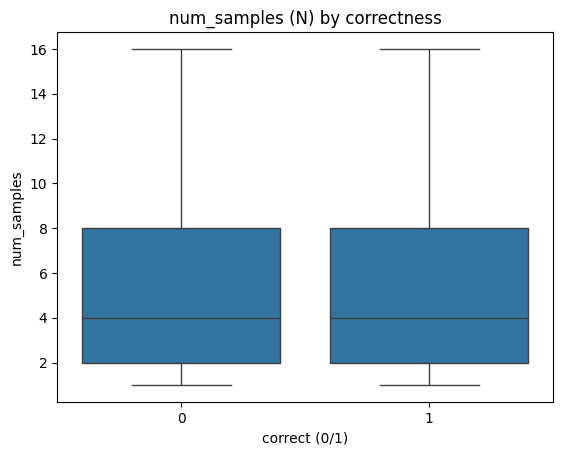

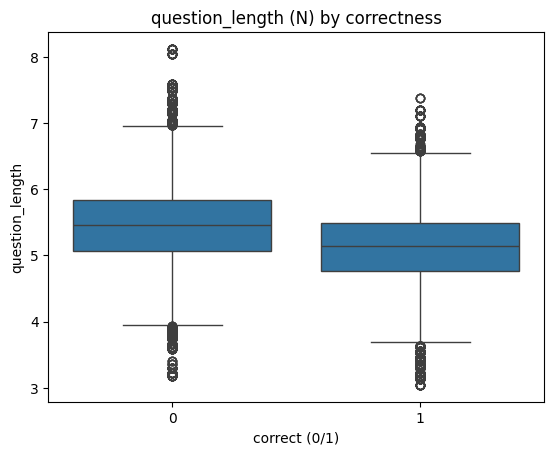

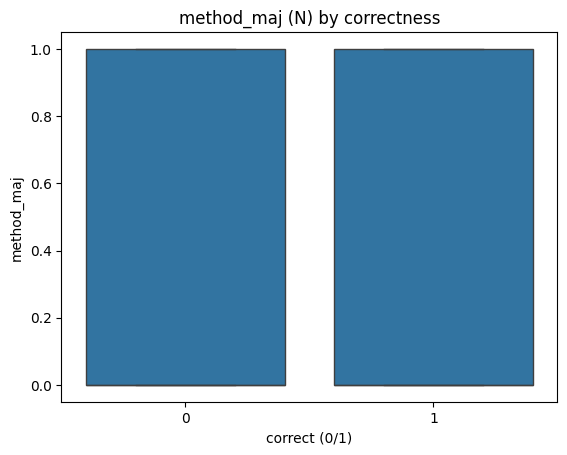

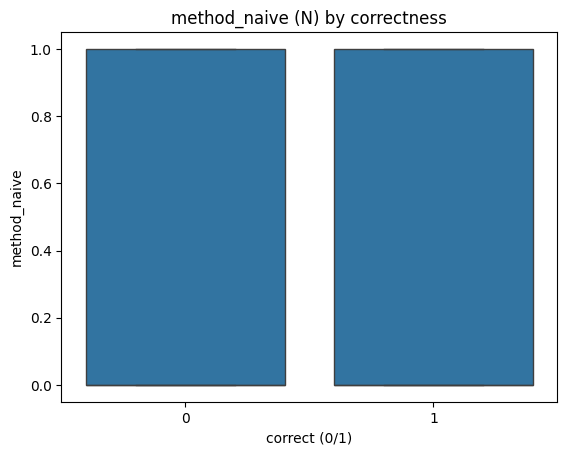

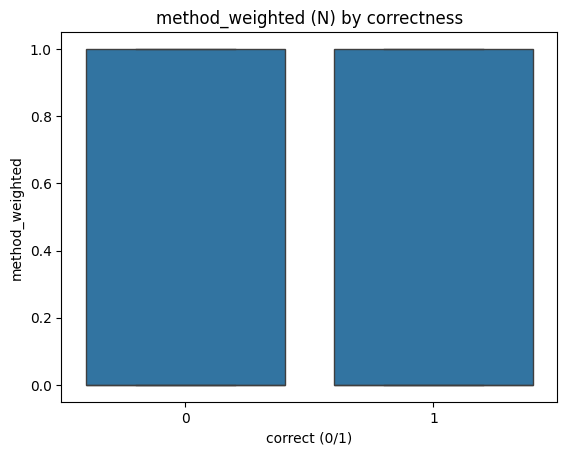

In [30]:
import seaborn as sns

for col in named_features.columns:
    sns.boxplot(x=y_train, y=named_features[col])
    plt.title(f"{col} (N) by correctness")
    plt.xlabel("correct (0/1)")
    plt.ylabel(col)
    plt.show()

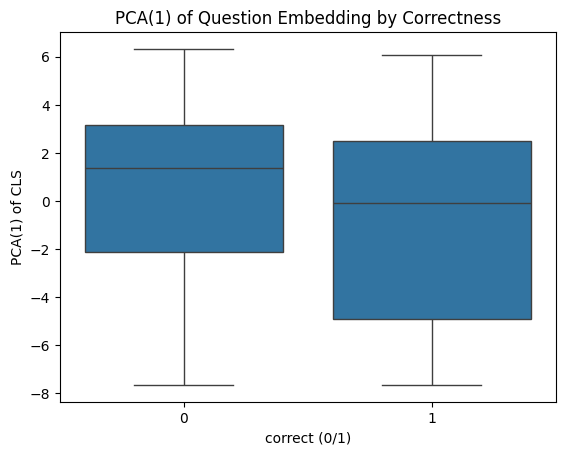

In [31]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 1D or 2D
pca = PCA(n_components=1)
cls_1d = pca.fit_transform(cls_part)[:, 0]

# Plot 1D PCA of CLS
sns.boxplot(x=y_train, y=cls_1d)
plt.title("PCA(1) of Question Embedding by Correctness")
plt.xlabel("correct (0/1)")
plt.ylabel("PCA(1) of CLS")
plt.show()

### Create Testing Data

In [39]:
# (Testing Data) Extract features: CLS + decoding parameters
cls_features = []

NUM_SAMPLES_SCALE = 1.0
QUESTION_LENGTH_SCALE = 1.0
METHOD_SCALE = 1.0

for _, row in df_test.iterrows():
    cls_vec = get_cls_embedding(row["question"])  # e.g., shape (768,)
    
    # Scalar features
    num_samples = row["N"] * NUM_SAMPLES_SCALE
    question_length = np.log(row["question_length"]) * QUESTION_LENGTH_SCALE
    method_maj = row["method_maj"] * METHOD_SCALE
    method_naive = row["method_naive"] * METHOD_SCALE
    method_weighted = row["method_weighted"] * METHOD_SCALE

    # Concatenate features
    features = np.concatenate([cls_vec, [num_samples, question_length, method_maj, method_naive, method_weighted]]) 
    cls_features.append(features)

In [40]:
X_test = np.array(cls_features)
y_test = df_test["indicator"].values.astype(int)
# y_test = df_test["sl"].values

In [32]:
# save X_test and y_test hard labels as .npz file.
output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_16/numina_hardlabel_Xy_test.npz"
# np.savez(output_file, X_test=X_test, y_test=y_test)

data = np.load(output_file)
X_test = data['X_test']
y_test = data['y_test']

### Train MLP.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 773), (60000,), (15000, 773), (15000,))

### MLP Classifier from sklearn

In [37]:
# 2-layer MLP Binary Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

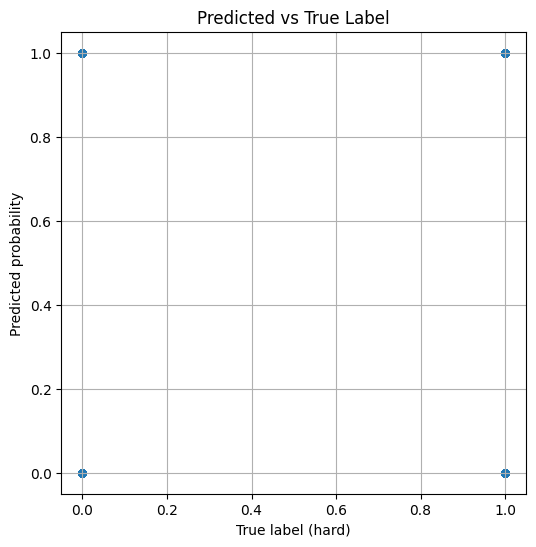

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=5e-3)
plt.xlabel("True label (hard)")
plt.ylabel("Predicted probability")
plt.title("Predicted vs True Label")
plt.grid(True)
plt.show()

In [39]:
from sklearn.calibration import CalibrationDisplay

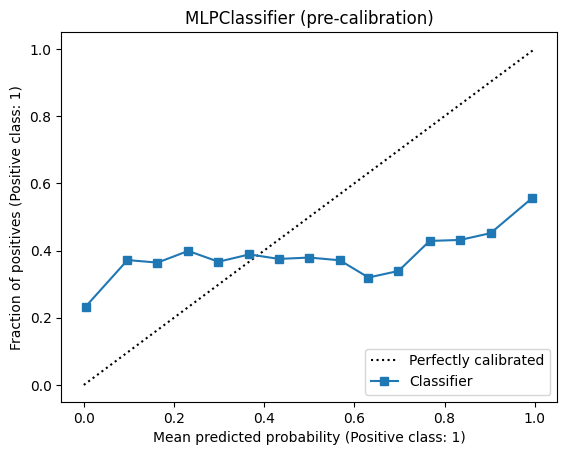

In [54]:
# Predict probabilities instead of labels
y_proba = mlp_clf.predict_proba(X_test)[:, 1]  # use probabilities for the positive class
# y_proba = hardLabel_preds_numpy  # use the soft label predictions directly
# Create calibration plot
disp = CalibrationDisplay.from_predictions(y_test, y_proba, n_bins=15)

plt.title("MLPClassifier (pre-calibration)")
# Show plot
plt.show()

Each point represents a group of test samples (i.e., the dot at "Fraction of positive" of 0.4 represents a group of test samples where 0.4 of the samples belong to the negative class)

In [42]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

Split train data into train and validate.

In [43]:
X_train_remain, X_calib, y_train_remain, y_calib = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [44]:
base_mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42)
base_mlp.fit(X_train_remain, y_train_remain)

,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


(1) train on NuminaMath. (2) calibrate.

Calibrate using validation set

In [45]:
calibrated_mlp = CalibratedClassifierCV(estimator=base_mlp, method='isotonic', ensemble=False, cv='prefit')
calibrated_mlp.fit(X_calib, y_calib)

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/sklearn/calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


,estimator,MLPClassifier...ndom_state=42)
,method,'isotonic'
,cv,'prefit'
,n_jobs,None
,ensemble,False
,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'


Use calibrated MLP to make predictions

In [46]:
# y_proba_base = base_mlp.predict_proba(X_test)[:, 1]
y_proba_calibrated = calibrated_mlp.predict_proba(X_test)[:, 1]

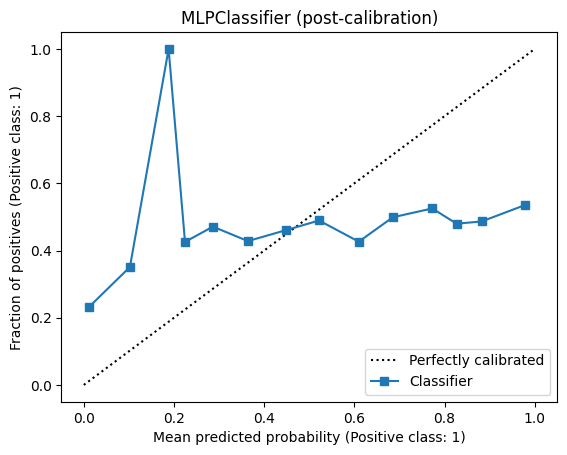

In [ ]:
CalibrationDisplay.from_predictions(y_test, y_proba_calibrated, n_bins=15)

plt.title("MLPClassifier (post-calibration)")
plt.show()

In [ ]:
# for ablation purposes (i want to test out whether the problem is with the poorly-calibrated difficulty probe; thus, i will test the probe on the training set.)
# y_pred_train = mlp_clf.predict(X_train)
# acc = accuracy_score(y_train, y_pred_train)
# print(f"Binary Classification Accuracy: {acc:.4f}")

Binary Classification Accuracy: 0.9911


In [ ]:
print(f"Binary Classification Accuracy: {acc:.4f}")
print(classification_report(y_test, y_proba >= 0.5))

Binary Classification Accuracy: 0.6663
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      9689
           1       0.53      0.56      0.54      5311

    accuracy                           0.67     15000
   macro avg       0.64      0.64      0.64     15000
weighted avg       0.67      0.67      0.67     15000



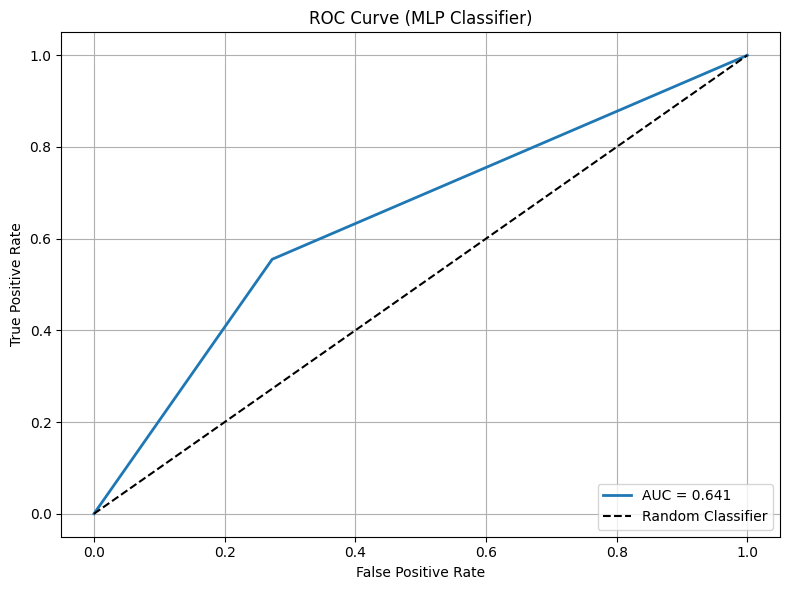

In [55]:
# AUC with all features.

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_proba = mlp_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC
auc = roc_auc_score(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MLP Classifier)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# plt.savefig("figs/roc_all_mlp.png")

### Train XGBoost Classifier

In [56]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:20:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [57]:
# features without N.
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Binary Classification Accuracy: {acc:.4f}")

Binary Classification Accuracy: 0.6900


In [58]:
# compute AUC
# Get predicted probabilities for the positive class (label 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

AUC: 0.7103


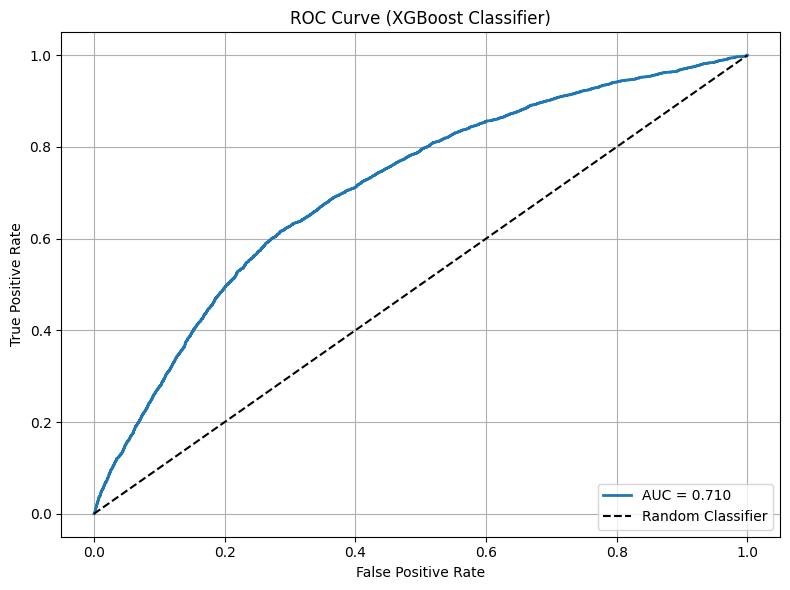

In [59]:
# AUC with all features.

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost Classifier)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()

In [60]:
import shap

explainer = shap.Explainer(model, X_train)     # TreeExplainer under the hood
shap_values = explainer(X_test)               # SHAP values for each sample

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 14961/15000 [00:51<00:00]        

In [61]:
# Example: get SHAP values for variables.
question_embedding_shap = shap_values.values[:, :-5]
num_samples_shap = shap_values.values[:, -5]
question_length_shap = shap_values.values[:, -4]
method_maj_shap = shap_values.values[:, -3]
method_naive_shap = shap_values.values[:, -2]
method_weighted_shap = shap_values.values[:, -1]

# Summary statistics
print(f"Mean SHAP value for 'num samples': {num_samples_shap.mean():.4f}")
print(f"Mean SHAP value for 'question length': {question_length_shap.mean():.4f}")
print(f"Mean SHAP value for 'method_maj': {method_maj_shap.mean():.4f}")
print(f"Mean SHAP value for 'method_naive': {method_naive_shap.mean():.4f}")
print(f"Mean SHAP value for 'method_weighted': {method_weighted_shap.mean():.4f}")
print(f"Mean SHAP value for 'question embedding': {question_embedding_shap.mean():.4f}")

Mean SHAP value for 'num samples': -0.0004
Mean SHAP value for 'question length': 0.1185
Mean SHAP value for 'method_maj': 0.0014
Mean SHAP value for 'method_naive': -0.0036
Mean SHAP value for 'method_weighted': 0.0022
Mean SHAP value for 'question embedding': 0.0006


In [ ]:
# predict probability of positive class (correct answer) for test set.
# y_proba = calibrated_mlp.predict_proba(X_test)[:, 1]

In [243]:
# for ablation purposes (i want to test out whether the problem is with the poorly-calibrated difficulty probe; thus, i will test the probe on the training set.)
y_proba_train = mlp_clf.predict_proba(X_train)[:, 1]

In [ ]:
# df_train['predicted_prob'] = hardLabel_preds_numpy
# df_train['predicted_prob'] = y_proba_train # sklearn MLPClassifier predictions (hard label version)
# df_test['predicted_prob'] = y_proba # XGBoost predictions from hard label.

In [245]:
df_train.head(5)

,question,score,score_list,completion_tokens,sb_idx,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,indicator,N,question_length,token_count,predicted_prob,method
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[275, 268, 203, 194, 325, 301, 206, 260, 272, ...",0,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...",1,1,161,275,0.998820,weighted
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[931, 938, 484, 1001, 600, 858, 964, 861, 817,...",1,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0,1,217,931,0.000036,weighted
2,How many positive whole-number divisors does 1...,"[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[374, 370, 350, 363, 184, 555, 463, 178, 538, ...",3,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",1,1,54,374,0.999751,weighted
3,The results of a cross-country team's training...,"[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[450, 183, 485, 327, 362, 653, 493, 367, 401, ...",4,[True],"[True, False]","[True, False, False, False]","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...",1,1,731,450,0.980819,weighted
4,A regular hexagon can be divided into six equi...,"[1.0, 1.0, 1.0, 0.9921875, 1.0, 0.0060119629, ...","[1.0, 1.0, 1.0, 0.9921875, 1.0, 0.0060119629, ...","[285, 204, 258, 175, 168, 93, 313, 335, 236, 2...",5,[True],"[True, True]","[True, True, True, False]","[True, True, True, False, True, False, True, F...","[True, True, True, False, True, False, True, F...",1,1,177,285,0.997842,weighted


In [90]:
# df_test["accuracy"] = df_test["correctness"].apply(lambda x: sum(x) / len(x))
# df_test.head()

In [91]:
# there should be 18 different BoN configurations for each query in the test set.
df_train.groupby('sb_idx').size().reset_index(name='count')

,sb_idx,count
0,0,15
1,1,15
2,2,15
3,3,15
4,4,15
...,...,...
3995,4994,15
3996,4995,15
3997,4996,15
3998,4998,15


In [92]:
# Transform method columns into a single 'method' column.

def decode_method(row):
    if row["method_maj"]:
        return "majority"
    elif row["method_naive"]:
        return "naive"
    elif row["method_weighted"]:
        return "weighted"
    else:
        return "unknown"

# Apply the function row-wise
df_test["method"] = df_test.apply(decode_method, axis=1)
# df_train["method"] = df_train.apply(decode_method, axis=1)

# drop the one-hot columns
df_test = df_test.drop(columns=["method_maj", "method_naive", "method_weighted"])
# df_train = df_train.drop(columns=["method_maj", "method_naive", "method_weighted"])

In [120]:
df_test.head()

,question,score,score_list,completion_tokens,sb_idx,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,indicator,N,question_length,token_count,predicted_prob,method
0,"In $\triangle ABC$, the lengths of the sides o...","[0.9140625, 0.4375, 0.0244140625, 0.0322265625...","[0.9140625, 0.4375, 0.0244140625, 0.0322265625...","[1045, 490, 1261, 920, 1196, 1036, 1024, 1118,...",5,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0,1,241,1045,0.006500,weighted
1,"Given that $b$ is a multiple of $2373$, find t...","[0.72265625, 0.478515625, 0.5625, 0.0212402344...","[0.72265625, 0.478515625, 0.5625, 0.0212402344...","[386, 349, 514, 712, 177, 565, 471, 534, 538, ...",10,[False],"[False, True]","[False, True, False, False]","[False, True, False, False, False, True, False...","[False, True, False, False, False, True, False...",0,1,105,386,0.397716,weighted
2,"The sum of three numbers $a$, $b$, and $c$ is ...","[0.0038909912, 0.671875, 0.640625, 0.166992187...","[0.0038909912, 0.671875, 0.640625, 0.166992187...","[15, 909, 546, 783, 621, 1222, 785, 576, 457, ...",18,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0,1,181,15,0.131791,weighted
3,"Three vertices of a cube are $A = (5, 9, 6)$, ...","[1.0, 1.0, 0.9921875, 1.0, 0.74609375, 0.28320...","[1.0, 1.0, 0.9921875, 1.0, 0.74609375, 0.28320...","[354, 316, 258, 348, 447, 278, 457, 322, 240, ...",25,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, False, True, True]","[True, True, True, True, True, False, True, Tr...",1,1,124,354,0.198560,weighted
4,Jimmy decides to make sandwiches for a picnic....,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[218, 73, 191, 205, 184, 187, 169, 174, 76, 19...",29,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",1,1,258,218,0.129767,weighted


In [ ]:
# df_test.head()

# # save test set with hard labels.
# output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_test_set.csv"
# df_test.to_csv(output_file, index=False)
# print(f"Test set with hard labels saved to {output_file}")

# save train set with hard labels.
# output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_train_set.csv"
# df_train.to_csv(output_file, index=False)
# print(f"Train set with hard labels saved to {output_file}")

Train set with hard labels saved to /dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_train_set.csv


In [ ]:
# # read prediction-with-hardLabel test set.
# df_test = pd.read_csv(output_file)
# df_test.head()

# read prediction-with-hardLabel (trained on PyTorch MLP) train set.
# df_train = pd.read_csv(output_file)
# df_train.shape

(7200, 16)

In [94]:
# turn completion_tokens into a list of ints.
df_test["completion_tokens"] = df_test["completion_tokens"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_train["completion_tokens"] = df_train["completion_tokens"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [95]:
df_test["token_count"] = df_test.apply(lambda row: sum(row["completion_tokens"][:row["N"]]), axis=1)
df_train["token_count"] = df_train.apply(lambda row: sum(row["completion_tokens"][:row["N"]]), axis=1)

START HERE IF YOU HAVE THE DATA FOR THE ROUTER (Best-of-32).

In [ ]:
# save df_test to csv
# df_test.to_csv("df_router_mv_bon.csv", index=False)
# df_test.to_csv("df_router_mv_bo32.csv", index=False)  # Bo32.
output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/hardlabel_train_set.csv"
# df_train.to_csv(output_file, index=False)

# load in csv.
# df_test = pd.read_csv("df_router_mv_bo32.csv") # Bo32.
df_train = pd.read_csv(output_file)  # Bo32 train set.

In [ ]:
# get the average accuracy and token_count for each configuration of step-beam that was run.
# config_summary_df_train = df_train.groupby(["N", "method"])[
#     ["indicator", "token_count"] # accuracy keeps track of Pass@N (aka, percentage of correct answers).
# ].mean().reset_index()
# config_summary_df = df_train.groupby(["N", "method"])[
#     ["indicator", "token_count"]
# ].mean().reset_index() # mean indicator is percentage of questions (out of 100 questions) that are answered correctly.

In [96]:
config_summary_df = df_test.groupby(["N", "method"])[
    ["indicator", "token_count"] # accuracy keeps track of Pass@N (aka, percentage of correct answers).
].mean().reset_index()

In [97]:
config_summary_df.head(20)

,N,method,indicator,token_count
0,1,majority,0.281,559.630
1,1,naive,0.281,559.630
2,1,weighted,0.281,559.630
3,2,majority,0.281,1122.950
4,2,naive,0.336,1122.950
5,2,weighted,0.336,1122.950
6,4,majority,0.331,2235.938
7,4,naive,0.380,2235.938
8,4,weighted,0.379,2235.938
9,8,majority,0.378,4470.211


In [98]:
config_summary_df.head(20)

,N,method,indicator,token_count
0,1,majority,0.281,559.630
1,1,naive,0.281,559.630
2,1,weighted,0.281,559.630
3,2,majority,0.281,1122.950
4,2,naive,0.336,1122.950
5,2,weighted,0.336,1122.950
6,4,majority,0.331,2235.938
7,4,naive,0.380,2235.938
8,4,weighted,0.379,2235.938
9,8,majority,0.378,4470.211


### Plot of Accuracies per Configuration
Config Summary DF.

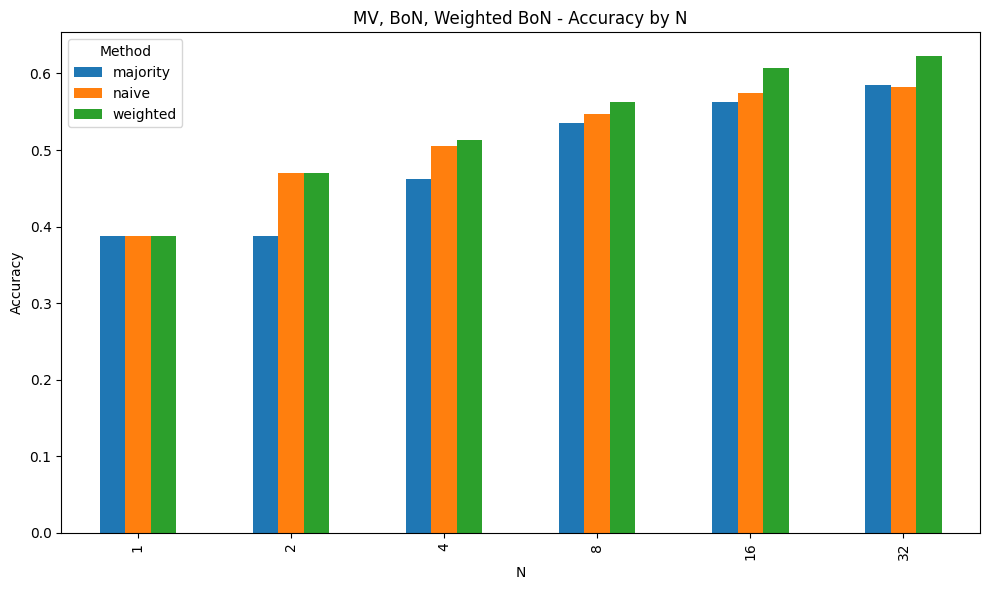

In [209]:
### TRAINING DF
# Pivot for plotting
pivot_df = config_summary_df.pivot(index="N", columns="method", values="indicator")

# Plot
pivot_df.plot(kind="bar", figsize=(10, 6))

plt.title("MV, BoN, Weighted BoN - Accuracy by N")
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.legend(title="Method")
plt.tight_layout()
plt.show()

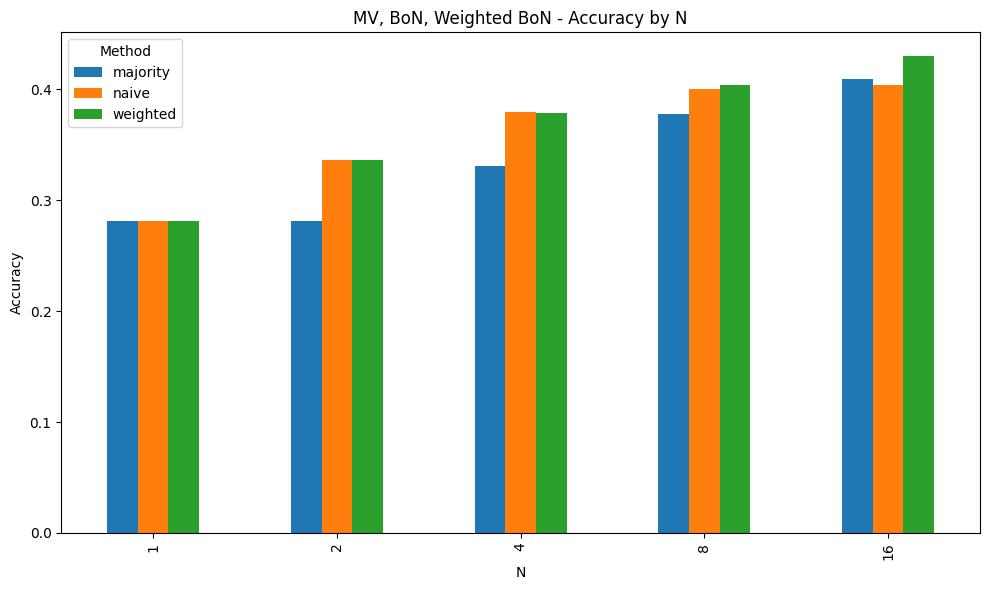

In [99]:
# TESTING DF
pivot_df = config_summary_df.pivot(index="N", columns="method", values="indicator")

# Plot
pivot_df.plot(kind="bar", figsize=(10, 6))

plt.title("MV, BoN, Weighted BoN - Accuracy by N")
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.legend(title="Method")
plt.tight_layout()
plt.show()

### Optimal-Utility Router

$$\text{Utility}(x, m) = \hat{a}_m(x) - \lambda \cdot \text{Cost}_m(x)$$

$$\text{Query-adaptive}(x, m) = \argmax_m \; \text{Utility}(x, m)

Input: A dataframe that contains rows for different settings (beam size, beam width, chunk size, etc.) and includes: an accuracy column, an avg_cot_token_count column (which is the cost), and a sb_idx column (which is the query).

A parameter, lambda, that controls how much the user is willing to tradeoff accuracy and cost.

For each group (i.e., all rows of the same query, or sb_idx):

It computes a utility value for each row:

$$\text{Utility}(x, m) = \hat{a}_m(x) - \lambda \cdot \text{Cost}_m(x)$$

It finds the row with the highest utility in that group.

Output:
A new DataFrame where each row corresponds to a query and contains:
the best utility found, the accuracy, and cost for that best-performing configuration.

In [123]:
# def get_max_utility(group): # verified that this was correct. (July 22nd)
#         group = group.copy()
#         group["utility"] = group["predicted_prob"] - lambda_ * group["token_count"]
#         # print(group["predicted_prob"], group["indicator"], group["token_count"], group["N"], group["method"])
#         idx_max = group["utility"].idxmax()
#         # print("max utility index is: ", idx_max)
#         return pd.Series({
#             "max_utility": group.loc[idx_max, "utility"],
#             "max_predicted_prob": group.loc[idx_max, "predicted_prob"],
#             "indicator": group.loc[idx_max, "indicator"], # indicator that keeps track of whether the answer is correct.
#             "max_cost": group.loc[idx_max, "token_count"],
#             "N": group.loc[idx_max, "N"],
#             "method": group.loc[idx_max, "method"],
#         })


def compute_max_utility_pred(df, lambda_):
    def get_max_utility(group): # verified correctness. (July 22nd)
        group = group.copy()
        group["utility"] = group["predicted_prob"] - lambda_ * group["token_count"]
        # print(group["predicted_prob"], group["indicator"], group["token_count"], group["N"], group["method"])
        idx_max = group["utility"].idxmax()
        # print("max utility index is: ", idx_max)
        return pd.Series({
            "max_utility": group.loc[idx_max, "utility"],
            "max_predicted_prob": group.loc[idx_max, "predicted_prob"],
            "indicator": group.loc[idx_max, "indicator"], # indicator that keeps track of whether the answer is correct.
            "max_cost": group.loc[idx_max, "token_count"],
            "N": group.loc[idx_max, "N"],
            "method": group.loc[idx_max, "method"],
        })

    result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
    return result_df

In [124]:
lambda_value = 0
# for large lambda values, the max-accuracy is 0/1 because N is small in BoN.
adaptive_router_0_lambda = compute_max_utility_pred(df_test, lambda_value)
adaptive_router_0_lambda.head() # 100 questions in the test set.

/tmp/ipykernel_2861928/573188091.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()


,sb_idx,max_utility,max_predicted_prob,indicator,max_cost,N,method
0,5,0.021412,0.021412,0,3716,4,weighted
1,10,0.693282,0.693282,0,735,2,weighted
2,18,0.707215,0.707215,0,11273,16,majority
3,25,0.873419,0.873419,1,6007,16,weighted
4,29,0.880300,0.880300,1,2436,16,weighted


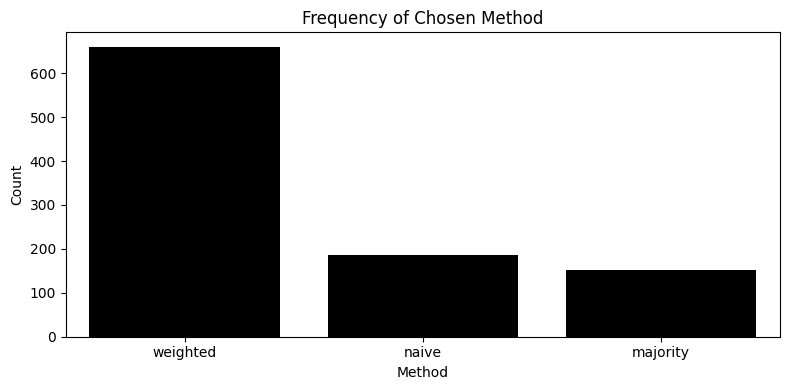

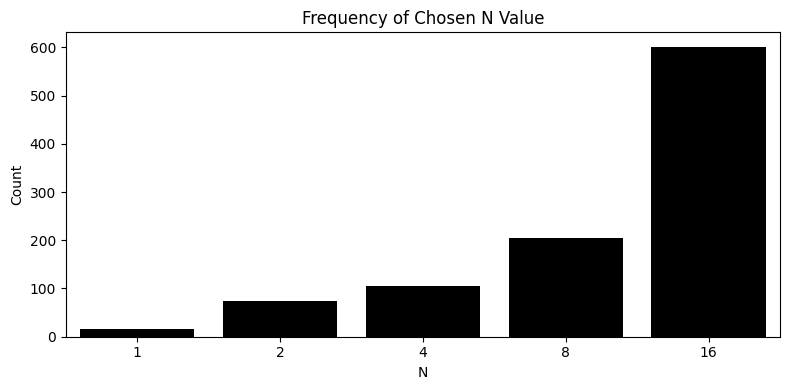

In [125]:
# Plot: Histogram of method counts
plt.figure(figsize=(8, 4))
sns.countplot(data=adaptive_router_0_lambda, x="method", order=adaptive_router_0_lambda["method"].value_counts().index, color="black")
plt.title("Frequency of Chosen Method")
plt.xlabel("Method")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot: Histogram of N values
plt.figure(figsize=(8, 4))
sns.countplot(data=adaptive_router_0_lambda, x="N", order=sorted(adaptive_router_0_lambda["N"].unique()), color="black")
plt.title("Frequency of Chosen N Value")
plt.xlabel("N")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [126]:
# average of indicator column to get the percentage of questions the router answers correctly.
average_accuracy = adaptive_router_0_lambda["indicator"].mean()
average_cost = adaptive_router_0_lambda["max_cost"].mean()
print(f"Average accuracy for lambda={lambda_value} is {average_accuracy:.4f}, average cost is: {average_cost:.4f}")
# print(f"Average cost is: {average_cost:.4f}")

Average accuracy for lambda=0 is 0.4120, average cost is: 6475.0270


In [129]:
# Sweep over lambda values
lambda_list = np.logspace(-60, -1, num=100) 

In [130]:
results = []

for lambda_value in lambda_list:
    adaptive_router = compute_max_utility_pred(df_test, lambda_value)
    # adaptive_router = compute_max_utility_pred(df_train, lambda_value)
    average_accuracy = adaptive_router["indicator"].mean() # accuracy as a percentage of questions (out of all questions in the test set) answered correctly.
    average_cost = adaptive_router["max_cost"].mean()
    average_predicted_prob = adaptive_router["max_predicted_prob"].mean()
    
    results.append({
        "lambda": lambda_value,
        "indicator": average_accuracy,
        "token_count": average_cost,
        "predicted_prob": average_predicted_prob,
    })

# Convert to DataFrame
query_adaptive_df = pd.DataFrame(results)
print(query_adaptive_df)

/tmp/ipykernel_2861928/573188091.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
/tmp/ipykernel_2861928/573188091.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
/tmp/ipykernel_2861928/573188091.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping colum

          lambda  indicator  token_count  predicted_prob
0   1.000000e-60      0.412     6475.027        0.441196
1   3.944206e-60      0.412     6475.027        0.441196
2   1.555676e-59      0.412     6475.027        0.441196
3   6.135907e-59      0.412     6475.027        0.441196
4   2.420128e-58      0.412     6475.027        0.441196
..           ...        ...          ...             ...
95  4.132012e-04      0.305      644.695        0.264773
96  1.629751e-03      0.281      563.093        0.210760
97  6.428073e-03      0.282      559.821        0.203603
98  2.535364e-02      0.281      559.654        0.201482
99  1.000000e-01      0.281      559.630        0.200807

[100 rows x 4 columns]


/tmp/ipykernel_2861928/573188091.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()


In [132]:
# the routed queries.
query_adaptive_df.head()

,lambda,indicator,token_count,predicted_prob
0,1.000000e-60,0.412,6475.027,0.441196
1,3.944206e-60,0.412,6475.027,0.441196
2,1.555676e-59,0.412,6475.027,0.441196
3,6.135907e-59,0.412,6475.027,0.441196
4,2.420128e-58,0.412,6475.027,0.441196


In [133]:
# rename column indicator to accuracy.
config_summary_df

,N,method,indicator,token_count
0,1,majority,0.281,559.630
1,1,naive,0.281,559.630
2,1,weighted,0.281,559.630
3,2,majority,0.281,1122.950
4,2,naive,0.336,1122.950
5,2,weighted,0.336,1122.950
6,4,majority,0.331,2235.938
7,4,naive,0.380,2235.938
8,4,weighted,0.379,2235.938
9,8,majority,0.378,4470.211


In [134]:
# outer join on the shared columns ("accuracy", "avg_cot_token_count")
query_optimal_static_df = pd.merge(
    query_adaptive_df,
    config_summary_df,
    on=["indicator", "token_count"],
    how="outer"
)
query_optimal_static_df.head()
# change NaN to -1 for plotting purposes.
query_optimal_static_df = query_optimal_static_df.fillna(-1)

In [137]:
query_optimal_static_df.head(1000)


,lambda,indicator,token_count,predicted_prob,N,method
0,1.000000e-01,0.281,559.630,0.200807,1.0,majority
1,1.000000e-01,0.281,559.630,0.200807,1.0,naive
2,1.000000e-01,0.281,559.630,0.200807,1.0,weighted
3,2.535364e-02,0.281,559.654,0.201482,-1.0,-1
4,1.629751e-03,0.281,563.093,0.210760,-1.0,-1
...,...,...,...,...,...,...
109,7.390722e-12,0.412,6475.027,0.441196,-1.0,-1
110,2.915053e-11,0.412,6475.027,0.441196,-1.0,-1
111,1.149757e-10,0.412,6475.027,0.441196,-1.0,-1
112,4.534879e-10,0.412,6475.027,0.441196,-1.0,-1


['majorityx1.0', 'naivex1.0', 'weightedx1.0', 'qa', 'qa', 'majorityx2.0', 'qa', 'qa', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'qa', 'qa', 'majorityx8.0', 'weightedx4.0', 'naivex4.0', 'qa', 'naivex8.0', 'weightedx8.0', 'naivex16.0', 'qa', 'majorityx16.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'weightedx16.0']


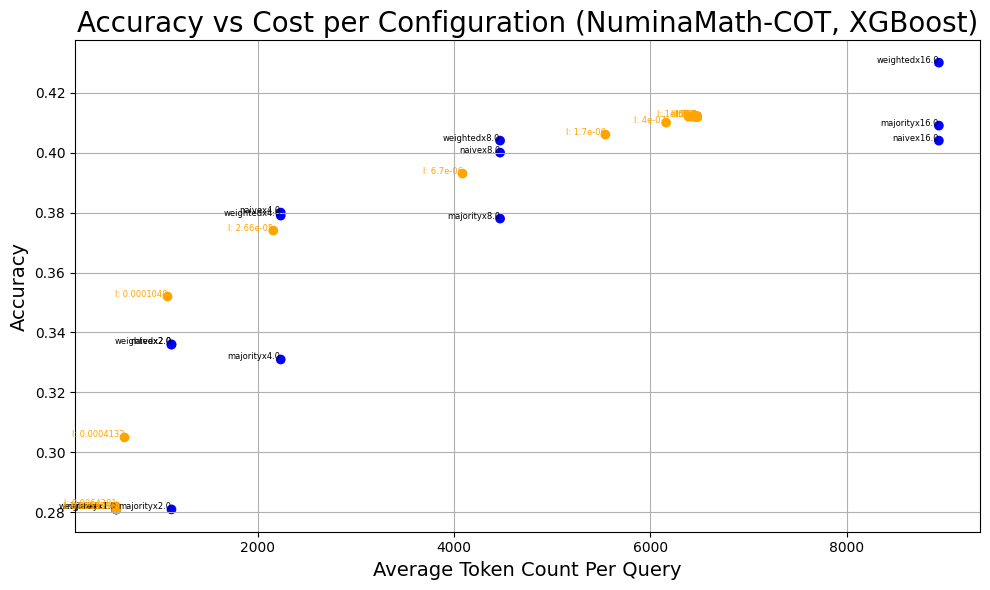

In [141]:
# Create color labels and text labels (sklearn MLPClassifier)
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["indicator"], color=colors)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Cost per Configuration (NuminaMath-COT, XGBoost)", fontsize=20)
plt.grid(True)
plt.tight_layout()

['majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'qa', 'qa', 'majorityx2.0', 'qa', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'qa', 'naivex4.0', 'weightedx4.0', 'majorityx8.0', 'naivex8.0', 'qa', 'weightedx8.0', 'majorityx16.0', 'naivex16.0', 'naivex32.0', 'majorityx32.0', 'weightedx16.0', 'weightedx32.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa']


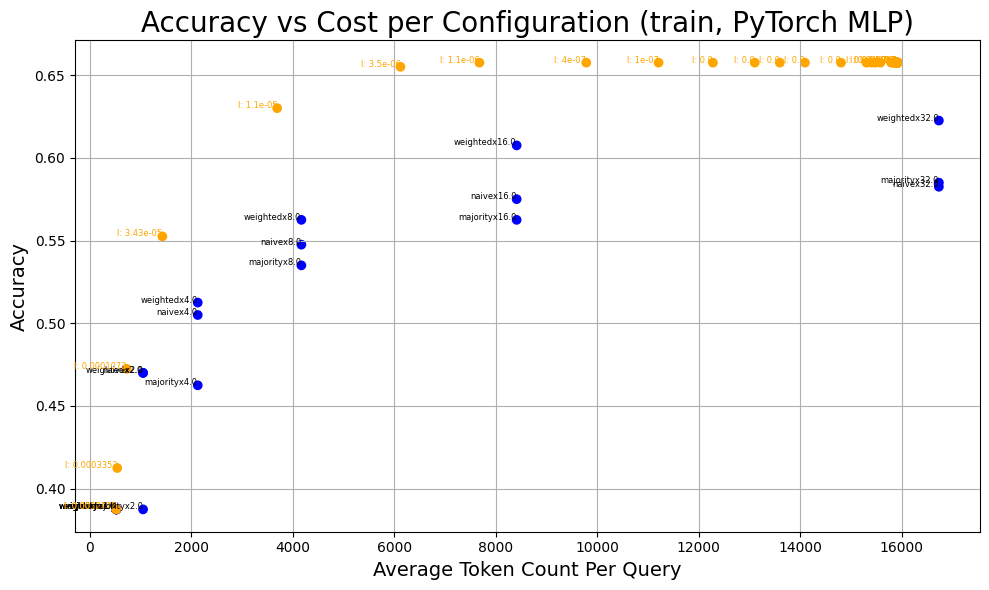

In [239]:
# Create color labels and text labels (pyTorch MLP)
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["indicator"], color=colors)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Cost per Configuration (train, PyTorch MLP)", fontsize=20)
plt.grid(True)
plt.tight_layout()

['majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx2.0', 'qa', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'qa', 'naivex4.0', 'weightedx4.0', 'majorityx8.0', 'naivex8.0', 'weightedx8.0', 'majorityx16.0', 'qa', 'naivex16.0', 'naivex32.0', 'majorityx32.0', 'weightedx16.0', 'weightedx32.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa']


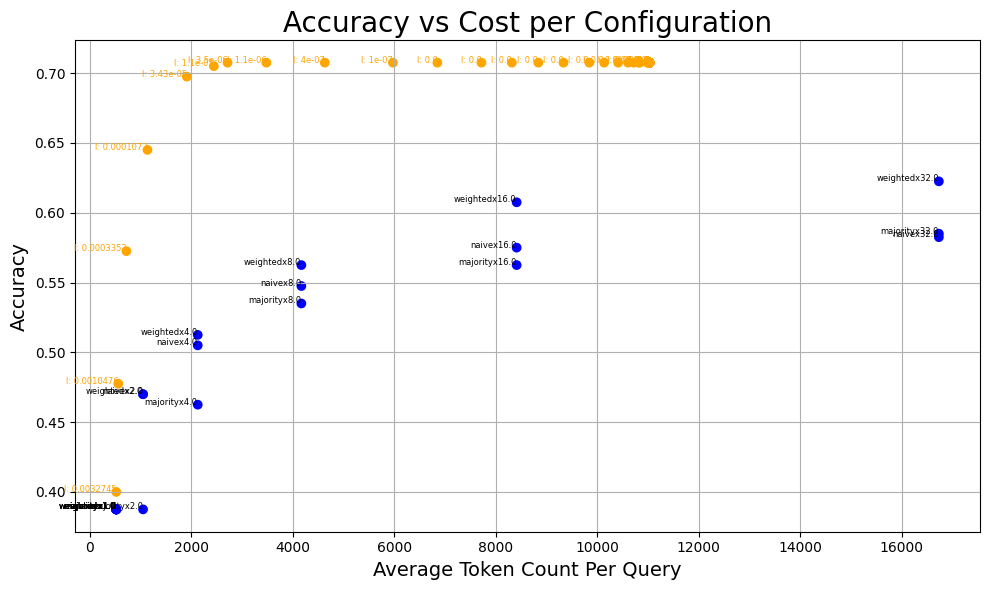

In [242]:
# Create color labels and text labels
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["indicator"], color=colors)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Cost per Configuration", fontsize=20)
plt.grid(True)
plt.tight_layout()

# plt.savefig("figs/accuracy_vs_cost_by_config3", dpi=300, bbox_inches='tight')

# notes: make sure we are plotting the accuracy. the probe should pick the weighted response.
# should not go below the blue dots. (check what you are actually plotting).